# Anxiety Detection through Sentiment Analysis and NLP
- Step 1: Gathering Data 
- Step 2: Cleaning Data
- Step 3: Data Analysis
- Step 4: Model
- Step 5: Testing and Analysing Model

# Step 1: Gathering Data
--------------------------------------
 2 Databases:
 -  https://www.kaggle.com/gargmanas/sentimental-analysis-for-tweets
 -  https://www.kaggle.com/kazanova/sentiment140
 
 Labelling the data and analysising sentiments and Analysis and observations on sentiment analysis:
 Attached in this github repo.

# Step 2: Cleaning Data
-------------------------------------

In [1]:
# Step 2: Cleaning Data => Removing Stop Words + Lemmatization + Remove [non-word charecters, single charecter, spaces , URLs]
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import string

def getsentiment(x):
    if(x==1):
        return -1*x
    else:
        return x+4

tabledep = pd.read_csv("dep.csv")
tabledep["label"] = tabledep["label"].apply(getsentiment)
coldep = [tabledep["message"],tabledep["label"]]
headers=["message","sentiment"]
datadep = pd.concat(coldep, axis=1,keys=headers)
print(datadep)

tablenorm = pd.read_csv("norm.csv",encoding='latin-1',header=None)
colnorm = [tablenorm[5],tablenorm[0]]
headers=["message","sentiment"]
datanorm = pd.concat(colnorm, axis=1,keys=headers)
print(datanorm)

dataframes = [datadep,datanorm]
datatotal = pd.concat(dataframes)

print(datatotal)

# data = data.head(5000)
input_data = datatotal['message']
output_data = datatotal['sentiment']

sentence = []

WordReduced = WordNetLemmatizer()

# Stop Words Set
stopWordsSet = set(stopwords.words('english'))
# print(stopWordsSet)


# cleaning data
def data_cleaning(data_sentence):
    data_sentence = re.sub(r'[^\w\s]','',str(data_sentence))
    
    data_sentence = re.sub(r'\s+[a-zA-Z]\s+','',data_sentence)

    data_sentence = re.sub(r'\s\s+','',data_sentence)

    data_sentence = re.sub('((www.[^s]+)| (https?://[^s]))','',data_sentence)

    data_sentence= data_sentence.lower()

    data_sentence = data_sentence.split()
    
    data_sentence = [WordReduced.lemmatize(word) for word in data_sentence]
    
    data_sentence = [word for word in data_sentence if word not in stopWordsSet]
    
    data_sentence = ' '.join(data_sentence)
    
    return data_sentence

datatotal["message"] = datatotal["message"].apply(lambda x: data_cleaning(x))
print("done")

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


                                                 message  sentiment
0      just had a real good moment. i missssssssss hi...          4
1             is reading manga  http://plurk.com/p/mzp1e          4
2      @comeagainjen http://twitpic.com/2y2lx - http:...          4
3      @lapcat Need to send 'em to my accountant tomo...          4
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder          4
...                                                  ...        ...
10309  No Depression by G Herbo is my mood from now o...         -1
10310  What do you do when depression succumbs the br...         -1
10311  Ketamine Nasal Spray Shows Promise Against Dep...         -1
10312  dont mistake a bad day with depression! everyo...         -1
10313                                                  0         -1

[10314 rows x 2 columns]
                                                   message  sentiment
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...          0
1        is upset 

# Step 3: Data Analysis
-----------------------------------

In [2]:
print(datatotal)
print(datatotal[datatotal["sentiment"] == -1]["message"])

                                                   message  sentiment
0                     hadreal good momentmissssssssss much          4
1                          reading mangahttpplurkcompmzp1e          4
2                     comeagainjen httptwitpiccom2y2lxhttp          4
3        lapcat need send em accountant tomorrow oddlyw...          4
4                         add myspacemyspacecomlookthunder          4
...                                                    ...        ...
1599995                      woke school best feeling ever          4
1599996  thewdbcomvery cool hear old walt interviewsâ h...          4
1599997                     ready mojo makeover ask detail          4
1599998  happy 38th birthday boo alll time tupac amaru ...          4
1599999  happy charitytuesday thenspcc sparkscharity sp...          4

[1610314 rows x 2 columns]
8000     lack understanding issmall significant part ca...
8001     told parent depression hard get genpeople unde...
8002     depre

start
done


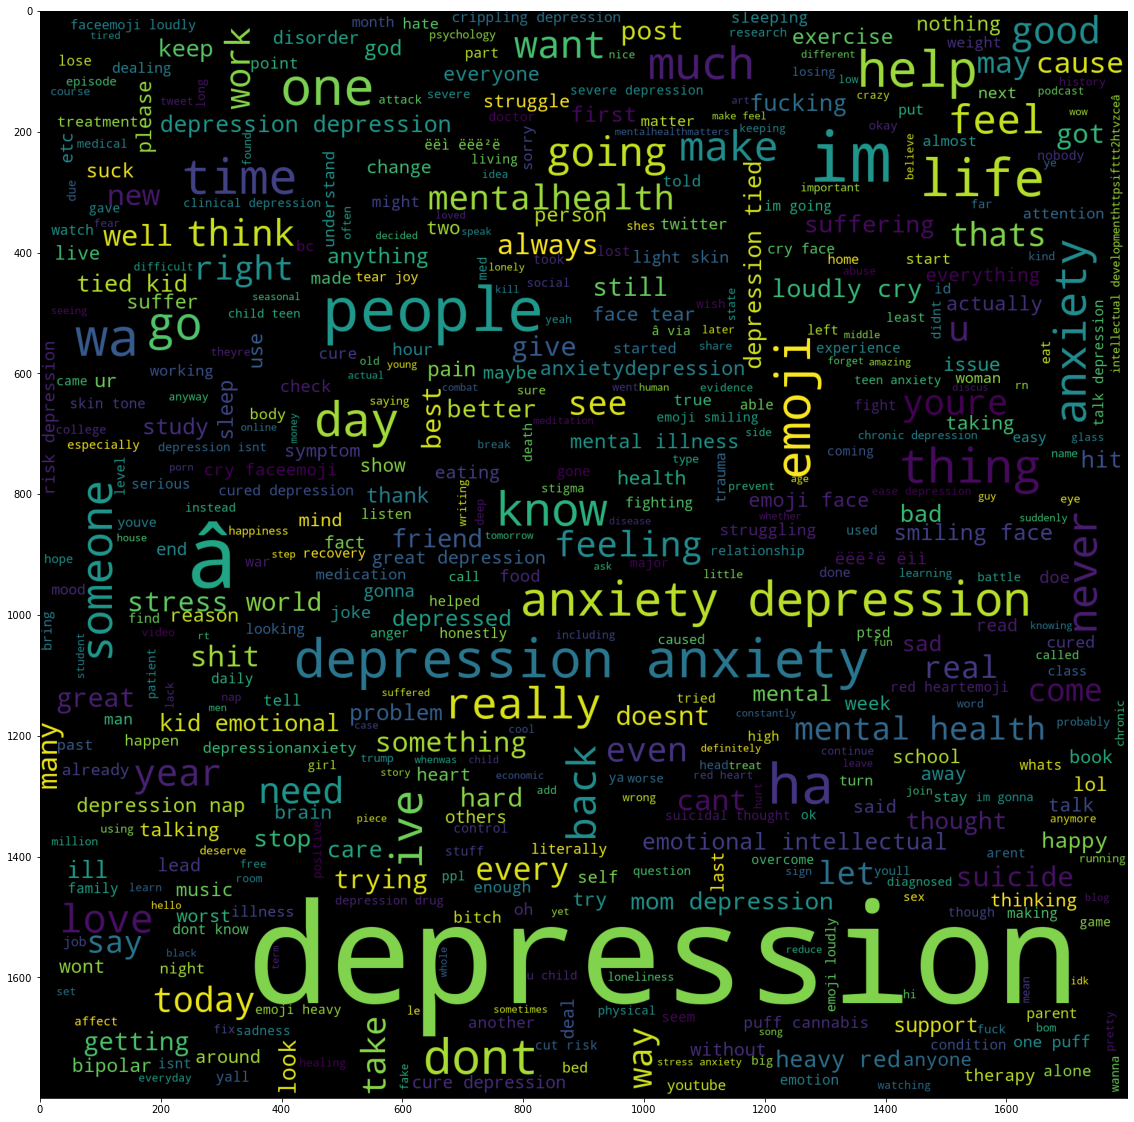

In [3]:
# WordCloud on Depression Sentiments
print("start")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

word_cloud_data = datatotal[datatotal['sentiment'] == -1]['message']
plt.figure(figsize = (20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")

start
done


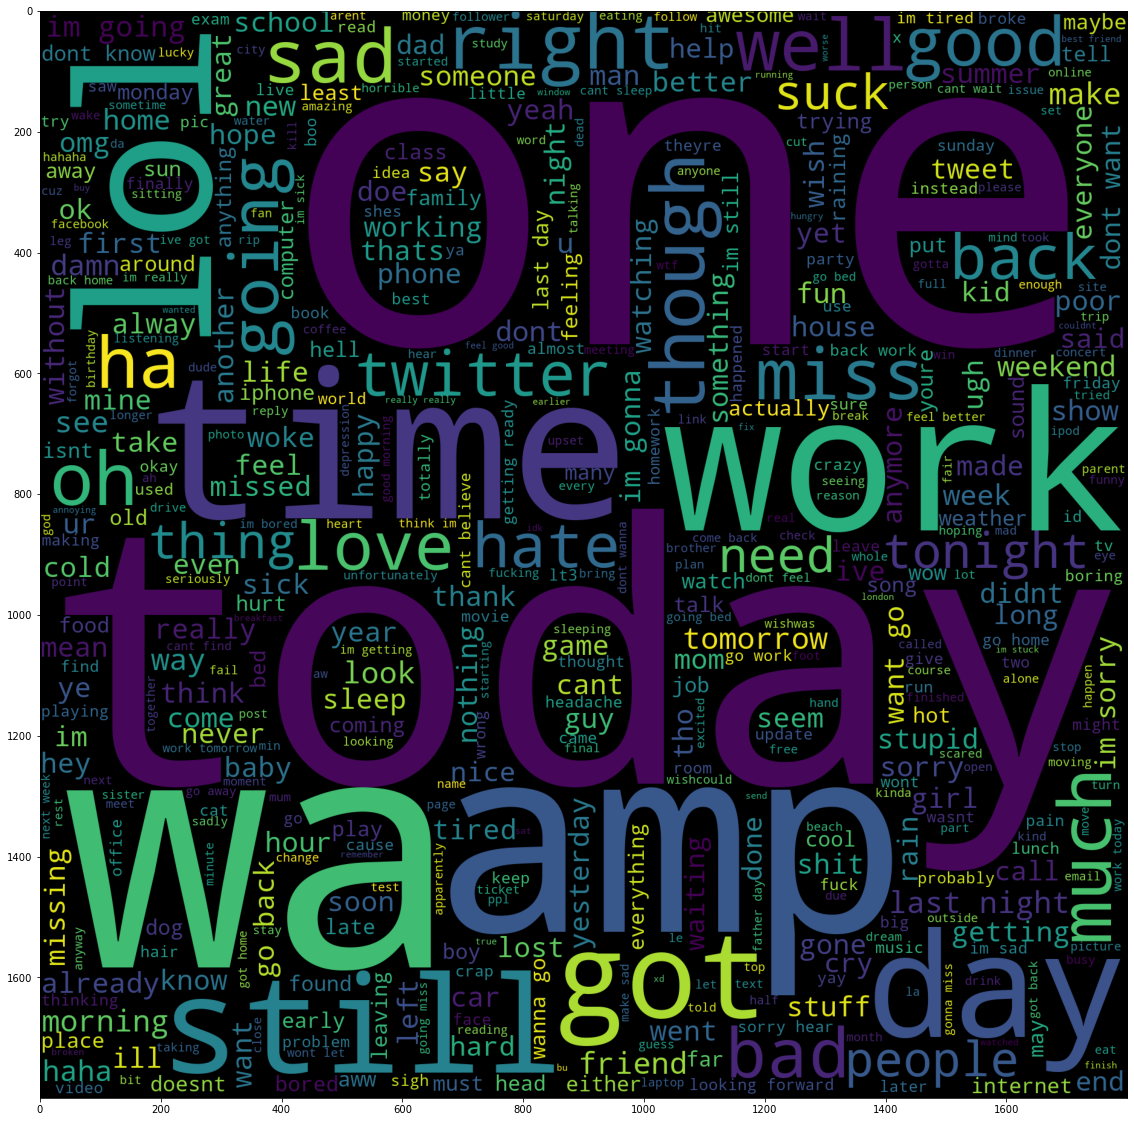

In [4]:
# WordCloud on Depressive + Negative Tweets
print("start")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# print(datatotal)
# print(datatotal[datatotal["sentiment"] == -1]["message"])
word_cloud_data = datatotal[datatotal['sentiment'] <= 0]['message']
plt.figure(figsize = (20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")



start
done


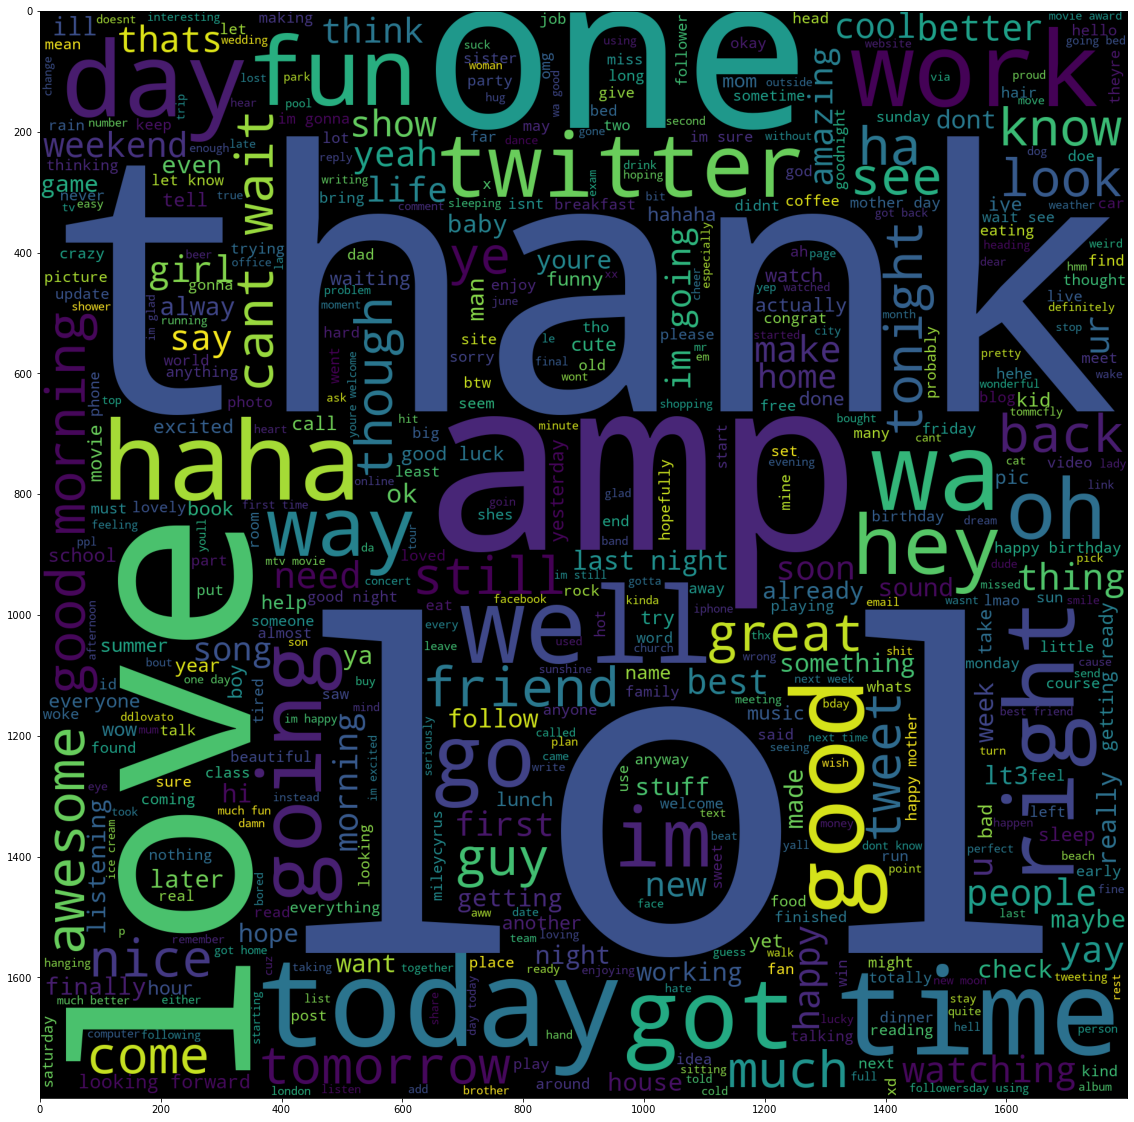

In [5]:
# WordCloud on Positive Tweets
print("start")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# print(datatotal)
# print(datatotal[datatotal["sentiment"] == -1]["message"])
word_cloud_data = datatotal[datatotal['sentiment'] == 4]['message']
plt.figure(figsize = (20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")


# Step 4: Model
-----------------------

In [6]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
input_data = datatotal["message"]
output_data = datatotal["sentiment"]
input_train,input_test,output_train,output_test = train_test_split(input_data , output_data, test_size = 0.2,random_state=156654)
print(input_train.shape)
print(input_test.shape)

(1288251,)
(322063,)


In [7]:
# Vectorizing input to input into model
print("start")
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser= TfidfVectorizer(ngram_range=(1,2),max_features = 500000)
vectoriser.fit(input_train)
input_train = vectoriser.transform(input_train)
input_test = vectoriser.transform(input_test)
print("done")

start
done


In [8]:
print("start")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# model = KNeighborsClassifier(n_neighbors=4)
model = LogisticRegression(C=2,max_iter= 1000,n_jobs=-1)
# model = DecisionTreeClassifier()
model.fit(input_train, output_train)

start


LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

# Step 5: Testing and Analysing Model
---------------------------------------------------------

In [9]:
from sklearn import metrics
from sklearn.metrics import classification_report

output_predicted = model.predict(input_test)
print(classification_report(output_test,output_predicted))
print(metrics.accuracy_score(output_test,output_predicted))

              precision    recall  f1-score   support

          -1       0.93      0.70      0.80       430
           0       0.78      0.75      0.77    160202
           4       0.76      0.79      0.78    161431

    accuracy                           0.77    322063
   macro avg       0.83      0.75      0.78    322063
weighted avg       0.77      0.77      0.77    322063

0.7713087191015422
